<a href="https://colab.research.google.com/github/YRYoung/HPC/blob/main/Assigenment/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

* Write a Python function that takes *N* as an input and returns the matrix *A* and vector *f*.
* You should use an appropriate sparse storage format for the matrix *A*.

In [ ]:
import numpy as np
from scipy.sparse import csr_matrix


def generate_mat(N):
    assert N >= 0
    if N == 0: return np.array([1]), np.array([1])

    f = np.concatenate([np.zeros(N), [1]], axis=0)

    A = np.zeros([N + 1, N + 1])
    for i in range(1, N):
        A[i, i - 1:i + 2] = [-1, 2. - (29 * 29 * np.pi * np.pi / 4 / N / N), -1]
    A[0, 0] = 1
    A[N, N] = 1

    f = csr_matrix(f)
    A = csr_matrix(A)
    # A = csc_matrix(A)

    return A, f


A, f = generate_mat(8)
print(A, '\n\n', f)

  (0, 0)	1.0
  (1, 0)	-1.0
  (1, 1)	-30.423192583266214
  (1, 2)	-1.0
  (2, 1)	-1.0
  (2, 2)	-30.423192583266214
  (2, 3)	-1.0
  (3, 2)	-1.0
  (3, 3)	-30.423192583266214
  (3, 4)	-1.0
  (4, 3)	-1.0
  (4, 4)	-30.423192583266214
  (4, 5)	-1.0
  (5, 4)	-1.0
  (5, 5)	-30.423192583266214
  (5, 6)	-1.0
  (6, 5)	-1.0
  (6, 6)	-30.423192583266214
  (6, 7)	-1.0
  (7, 6)	-1.0
  (7, 7)	-30.423192583266214
  (7, 8)	-1.0
  (8, 8)	1.0 

   (0, 8)	1.0


* compute the approximate solution for your problem for *N=10*, *N=100*, and *N=10*.
* Plot the solutions for these three values of *N*.



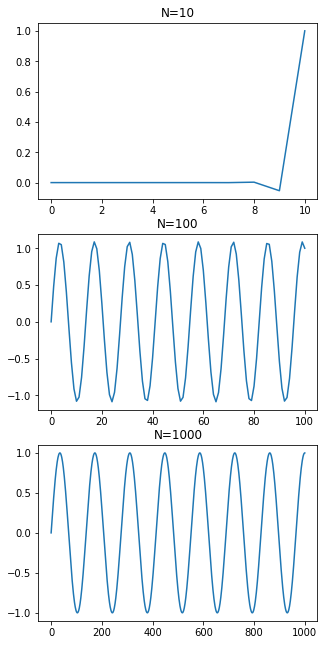

In [ ]:
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

i = 0
fig, ax = plt.subplots(3, 1, figsize=(5, 11))
print(ax)

for N in [10, 100, 1000]:
    A, f = generate_mat(N)
    u = spsolve(A, f.T)

    x = np.linspace(0, N, N + 1)
    ax[i].plot(x, u)
    ax[i].set_title('N=' + str(N))
    i = i + 1

plt.show()

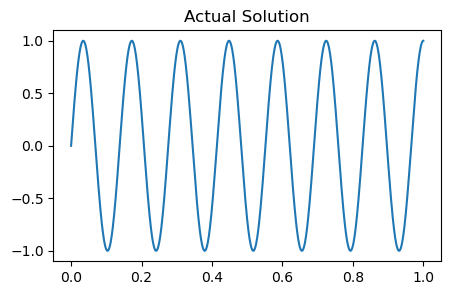

In [ ]:
k = 29. * np.pi / 2.
x = np.linspace(0, 1, 1000)

u = np.sin(k * x)
plt.figure(figsize=(5, 3))
plt.plot(x, u)
plt.title('Actual Solution')
plt.show()

* Briefly (1-2 sentences) comment on your plots:

  + __How different__ are they to each other? 

  + Which do you expect to be **closest** to the actual solution of the wave problem?





Closest: N=1000

* Compute this error for a range of values for  of your choice, on axes that use log scales
* plot *N* against the error in your solution.

100%|██████████| 70/70 [00:15<00:00,  4.59it/s]


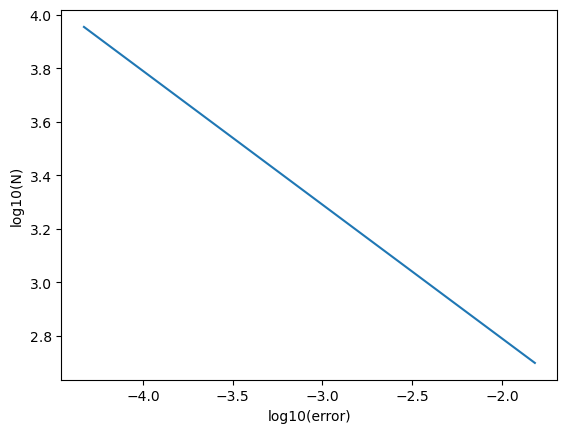

In [ ]:
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

k = 29. * np.pi / 2.
error = []
sizes = np.round(np.linspace(500, 9000, 70))
for i, N in enumerate(tqdm(sizes)):
    x = np.linspace(0, 1, int(N + 1))
    A, f = generate_mat(int(N))
    u = spsolve(A, f.T)
    u_exact = np.sin(k * x)  #!!
    error.append(np.max(np.abs(u - u_exact)))

plt.plot(np.log10(error), np.log10(sizes))
plt.xlabel('log10(error)')
plt.ylabel('log10(N)')
ax = plt.gca()
plt.show()

# print(sizes, '\n', error)

* For the same values of *N*, measure the time taken to compute your approximations for both functions.
* On axes that both use log scales, plot *N* against the time taken to compute a solution.

  0%|          | 0/70 [00:00<?, ?it/s]

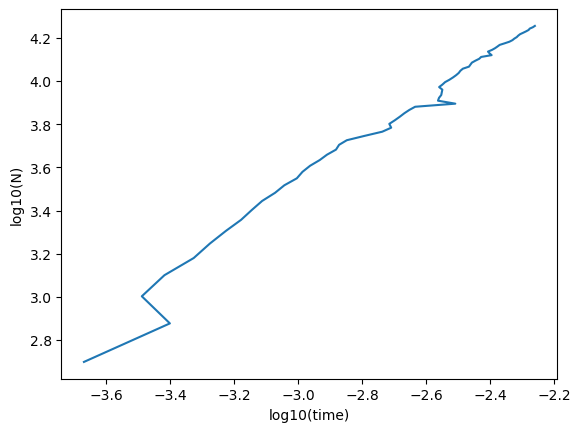

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import timeit

k = 29. * np.pi / 2.
times = []
sizes = np.round(np.linspace(500, 18000, 70))
for i, N in enumerate(tqdm(sizes)):
    x = np.linspace(0, 1, int(N + 1))
    A, f = generate_mat(int(N))

    t = timeit.Timer(lambda: spsolve(A, f.T)).timeit(1000)

    times.append(t / 1000)

plt.plot(np.log10(times), np.log10(sizes))

plt.xlabel('log10(time)')
plt.ylabel('log10(N)')
plt.show()

* pick a value of that you would expect to give error of or 10<sup>-8</sup> less.
* Briefly (1-2 sentences) explain how you picked your value of *N*
* predict how long the computation will take

Compute the approximate solution with your value of *N*.
Measure the time taken and the error, and briefly (1-2 sentences) comment on how these compare to your predictions.

In [ ]:
from sympy import symbols, solve
import math

log_time = np.log10(times)
log_error = np.log10(error)
log_size = np.log10(sizes)

f1 = np.polyfit(log_error, log_size, 1)
print('Fit function of log_error & log_size:', np.poly1d(f1))

x = symbols('x')
a = solve(f1[0] * x + f1[1] < -8)
print('\nInequation:\n', a)
result_logN = a.args[0].args[0]
result_N = math.ceil(math.pow(10., result_logN))
print('\nExpected minimum value of N that satisfies the given condition:\n', result_N)

f2 = np.polyfit(log_size, log_time, 1)
print('\nFit function of log_size & log_time:', np.poly1d(f2))

x_time = math.pow(10., f2[0] * result_logN + f2[1])
print('\nExpected computation time:\n{:.0f}'.format(x_time))

Fit function of log_error & log_size:  
-0.5 x + 1.79

Inequation:
 (19.5817139884942 < x) & (x < oo)

Expected minimum value of N that satisfies the given condition:
 38169281820259123200

Fit function of log_size & log_time:  
0.7968 x - 5.736

Expected computation time:
7345529402


# Part2

* Implement this iterative scheme in Python.
    * You should implement this as a function that takes as an input.

In [175]:
from sympy.solvers import solve_undetermined_coeffs
import numpy as np


def solve_u(N, t):
    h = 1 / N
    T = N * t
    u = np.zeros((N + 1, T + 1))
    A = np.zeros((N-1,N+1))
    # u[:,0]=0

    u[0, :] = 10
    u[N, :] = 10
    for i in range(N-1):
      A[i,i:i+3] = [1/ 1000 / h,1- 2 / 1000 / h , 1/ 1000 / h]

    for j in range(1,T + 1):
      u[1:N, j] = A @ u[:,j-1]

    return u


In [174]:
print(solve_u(5,3)[:,-1])

[10.          0.70023597  0.02461007  0.02461007  0.70023597 10.        ]


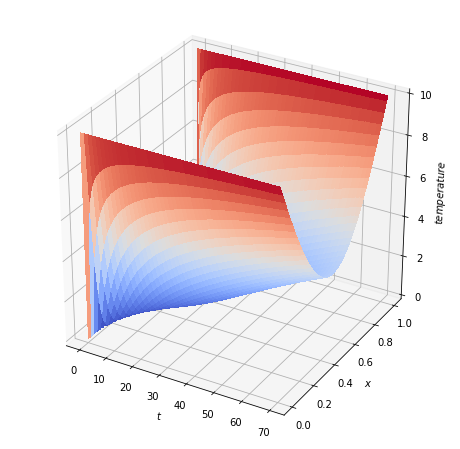

In [178]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm

N = 400
t = 70

sol = solve_u(N, t)
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
ticksX = np.linspace(0, t, N * t + 1)
ticksY = np.linspace(0, 1, N + 1)
X, Y = np.meshgrid(ticksX, ticksY)
surf = ax.plot_surface(X, Y, sol, antialiased=False, cmap=cm.coolwarm)
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x$')
ax.set_zlabel(r'$temperature$')

plt.show()

* plot the temperature of the rod at *t=1, t=2* and *t=10* .

  0%|          | 0/3 [00:00<?, ?it/s]

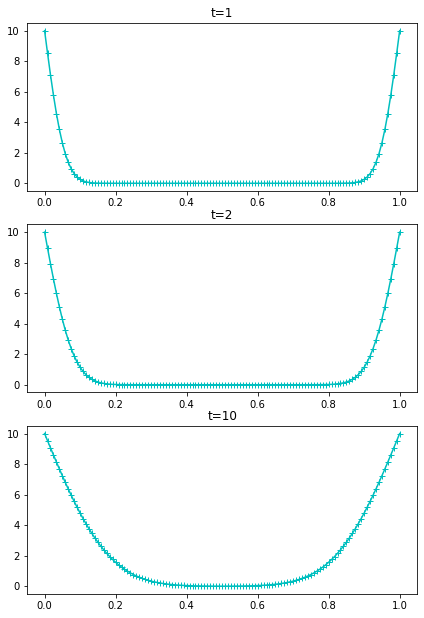

In [179]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np

N = 120
ts = np.array([1, 2, 10])

fig, ax = plt.subplots(len(ts), 1, figsize=(7, len(ts) * 3.5))
u = solve_u(N, np.max(ts))

x = np.linspace(0, 1, N + 1)

for count, t in enumerate(tqdm(ts)):
    ax[count].plot(x, u[:, t*N], 'c+-')
    ax[count].set_title('t=' + str(t))

plt.show()

* Briefly (1-2 sentences) comment on how you picked a value for *N*.

In [21]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np

t = 10

N=10
u = solve_u(N, t)
print()


N=500
while(True):
  print(N)
  u = solve_u(N, t)
  if True in np.isnan(u):
    break
  N+=1
    



500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


* Use numba.cuda to parallelize your implementation on a GPU
    * think carefully about when data needs to be copied, and be careful not to copy data to/from the GPU when not needed.

In [132]:

import numpy as np
from numba import cuda


def solve_u_gpu(N, t):
    T = N * t
    h = 1 / N
    block_per_grid = 5
    t_per_block_i = (N + 1) // block_per_grid + 1  #最后一个拿来加j

    blocks = (block_per_grid, 1)
    threads = (t_per_block_i, 1)

    @cuda.jit
    def kernel(u, j):
        px = cuda.grid(1)
        if px >= N + 1 or j >= T + 1:
            return

        if px == 0 or px == N:
            u[px, j] = 10
        else:
            u[px, j] = u[px, j - 1] + (u[px - 1, j - 1] - 2 * u[px, j - 1] + u[px + 1, j - 1]) / 1000 / h

        cuda.syncthreads()

    # print('blocks/grid: {0} ({2}*{2})\nthreads/block: {1} ({3}*{3})'.format(block_per_grid ** 2, t_per_block ** 2,
    #                                                                         block_per_grid, t_per_block))
    u = cuda.device_array(shape=(N + 1, T + 1), dtype=np.float32)
    u[:, 0] = 0
    u[0, :] = 10
    u[N, :] = 10
    for j in range(1, T + 1):
        kernel[blocks, threads](u, j)

    u = u.copy_to_host()

    return u


In [24]:
def cuda_init():
    cuda.detect()
    a = cuda.device_array(shape=(2, 2), dtype=np.float32)
    print('Initialization complete')


cuda_init()

Found 1 CUDA devices
id 0             b'Tesla T4'                              [SUPPORTED]
                      Compute Capability: 7.5
                           PCI Device ID: 4
                              PCI Bus ID: 0
                                    UUID: GPU-11e7dce8-fd97-786e-c30e-44d414f1e104
                                Watchdog: Disabled
             FP32/FP64 Performance Ratio: 32
Summary:
	1/1 devices are supported
Initialization complete


* Use your code to estimate the time at which the temperature of the midpoint of the rod first exceeds a temperature of 9.8.
* Briefly (2-3 sentences) describe how you estimated this time.

/usr/local/lib/python3.7/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.7/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 61 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.7/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 5 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Minimum t that satisfies the given condition: 421.39772727272725


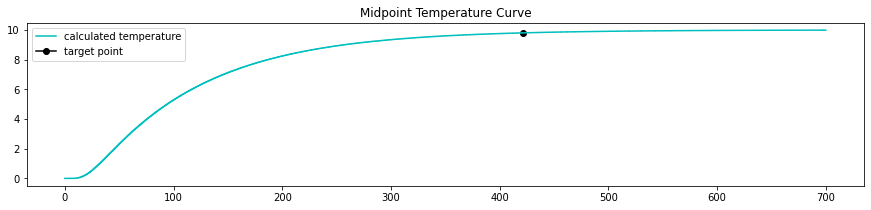

In [28]:

import matplotlib.pyplot as plt

N = 88
x = N // 2
t = 700
T = N * t

plt.figure(figsize=(15, 3))
u = solve_u_gpu(N, t)[x, :]

t = np.linspace(0, T, T + 1)

target_T = np.argwhere(u >= 9.8)[0]
target_t = target_T / N

print('Minimum t that satisfies the given condition: {}'.format(float(target_t)))

p1, = plt.plot(target_t, u[target_T], marker='o', color='black')
p2, = plt.plot(t // N, u, 'c-')
plt.title('Midpoint Temperature Curve')

plt.legend([p2, p1], ["calculated temperature", 'target point'], loc='upper left')

plt.show()

In [134]:
print(solve_u_gpu(5,3)[:,-1])

[10.          0.70023596  0.02461007  0.02461007  0.70023596 10.        ]


/usr/local/lib/python3.7/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.7/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 5 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
